In [5]:
#Importing the librarires
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
# PIL as Python Image library
from PIL import Image

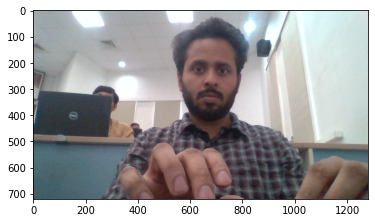

In [6]:
img = Image.open('Ashish.jpg')
plt.imshow(img)

In [7]:
width, height = img.size
print(width)
print(height)

1280
720


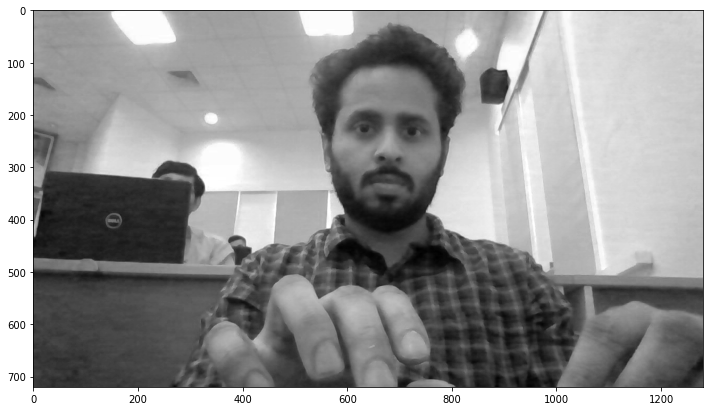

In [13]:
# getdata() Returns the contents of this image as a sequence object containing pixel values. 
# The sequence object is flattened, so that values for line one follow directly after the values of line zero
# And so on.
# The sequence object returned by this method is an internal PIL data type, which only supports certain sequence operations. 
# To convert it to an ordinary sequence use list(img.getdata())
# band – What band to return. The default is to return all bands. 
# To return a single band, pass in the index value (e.g. 0 to get the “R” band from an “RGB” image).
# Converting list to numpy array
imgmat = np.array(list(img.getdata(band=0)),float)
# Reshaping as per the to original image to get the matrix for SVD
imgmat.shape = (img.size[1], img.size[0])
plt.figure(figsize=(12,8))
plt.imshow(imgmat, cmap='gray')
plt.show()

In [14]:
imgmat.shape

(720, 1280)

In [15]:
#Applying the SVD on image
U, D, V = np.linalg.svd(imgmat)

In [16]:
#Checking the shape of Matrices
U.shape

(720, 720)

In [17]:
D.shape

(720,)

In [18]:
V.shape

(1280, 1280)

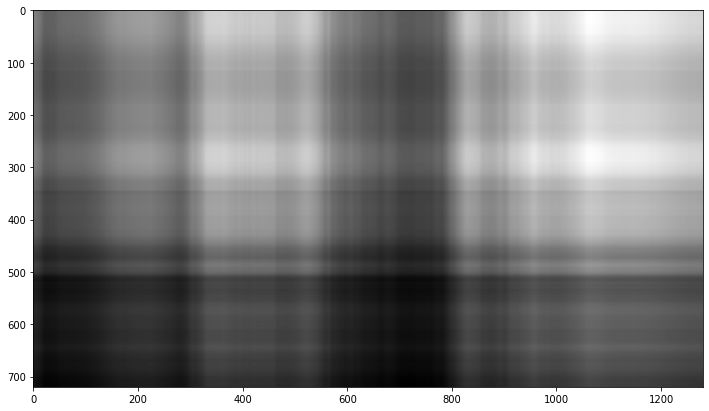

In [21]:
# We know that, Singular values are always ordered from highest to lowest 
# Lets try making use of different number of siingular values in re-constructing the image
# And see how many we need to re construct a decent image
## Test with 1 singular value

reconstimg = np.matrix(U[:,:1])*np.diag(D[:1])*np.matrix(V[:1,:])
plt.figure(figsize=(12,8))
plt.imshow(reconstimg,cmap='gray')
plt.show()

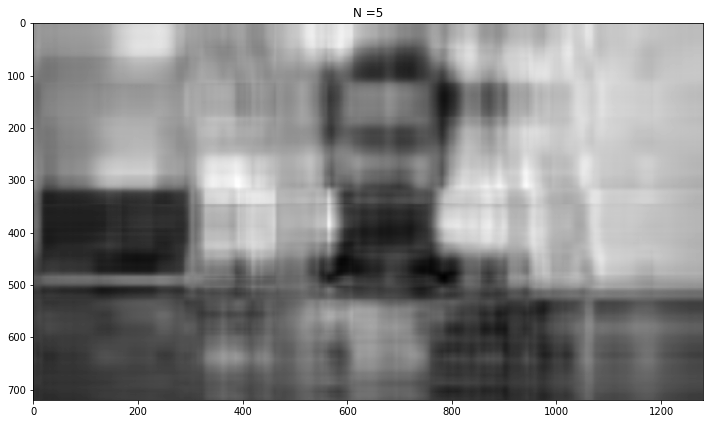

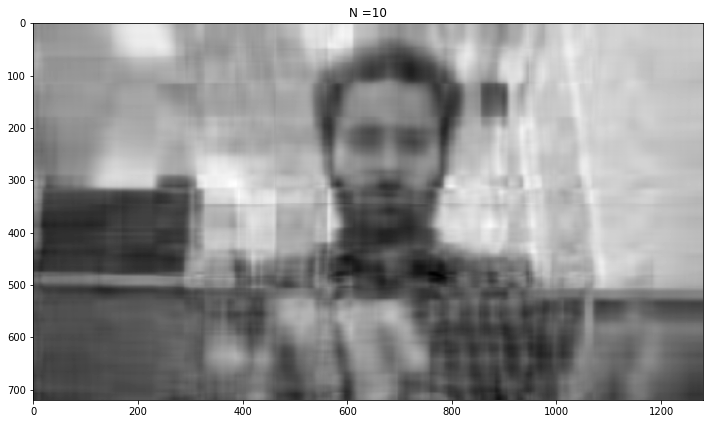

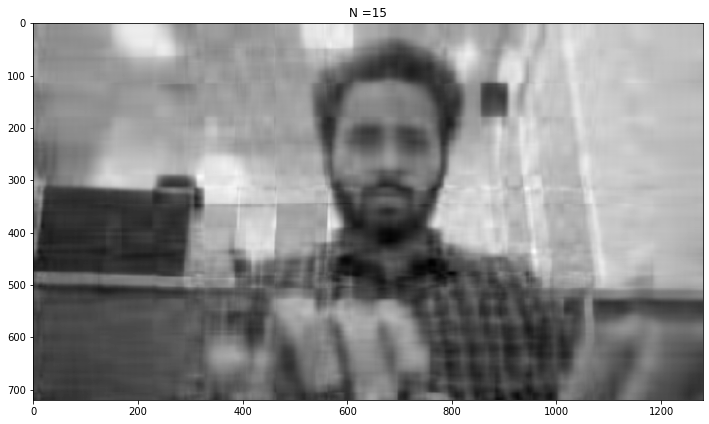

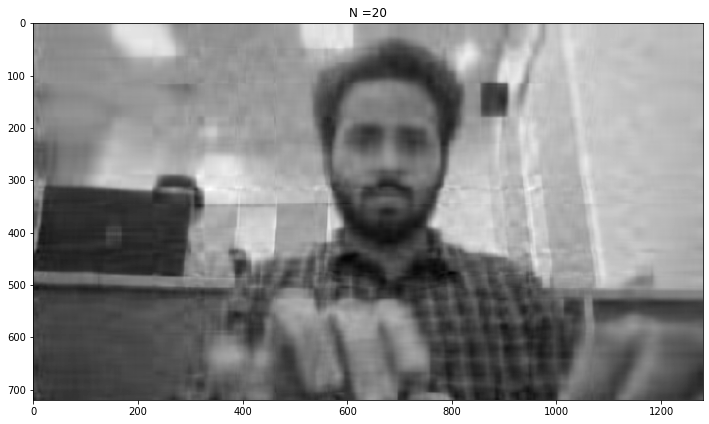

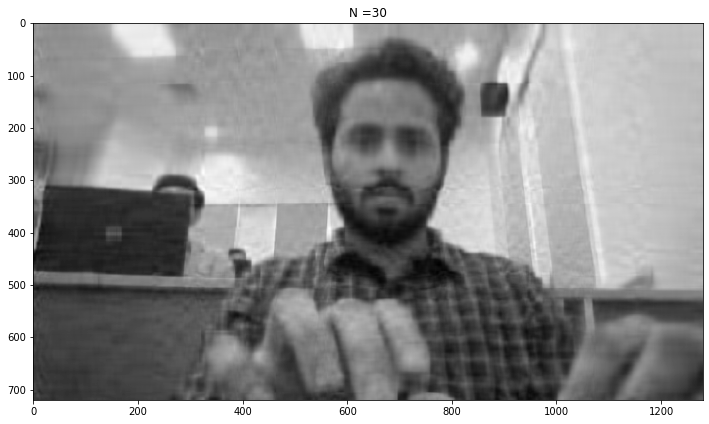

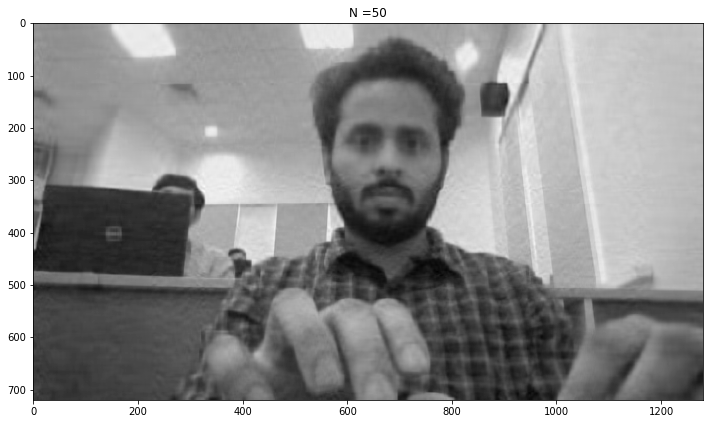

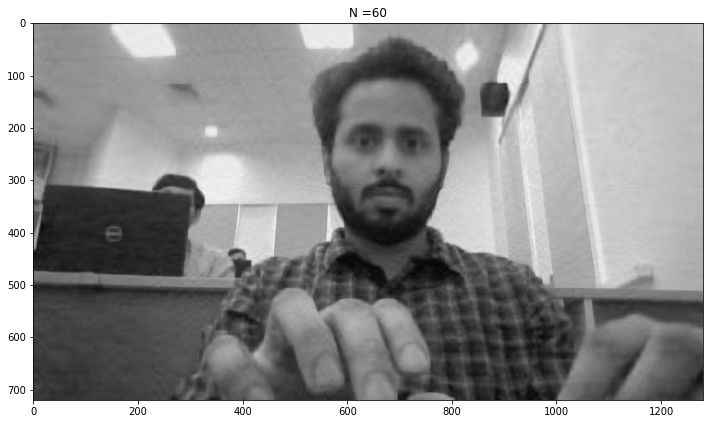

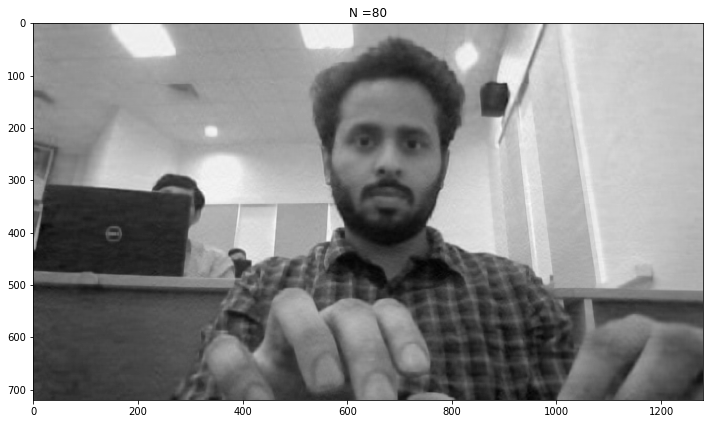

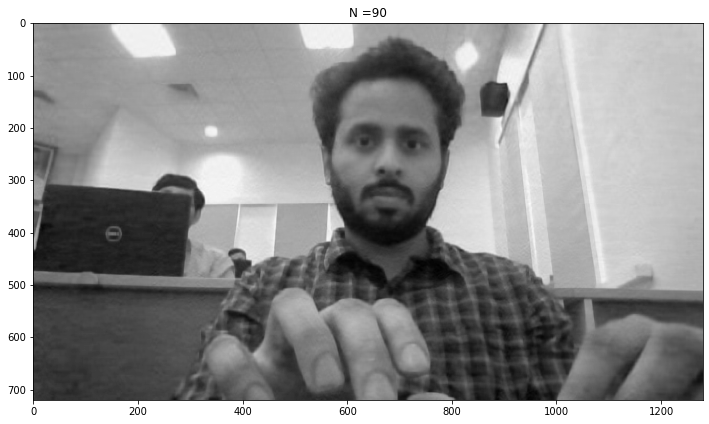

In [22]:
#Lets run for diferent singular values
sv=[5,10,15,20,30,50,60,80,90]
for i in sv:
    reconstimg= np.matrix(U[:,:i])*np.diag(D[:i])*np.matrix(V[:i,:])
    plt.figure(figsize=(12,8))
    plt.imshow(reconstimg,cmap='gray')
    title="N =%s" %i
    plt.title(title)
    plt.show()